In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [37]:
city_data_to_load = 'city_data.csv'
ride_data_to_load = 'ride_data.csv'

In [38]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Inspecting City Data

In [39]:
# Checking if there exis Null values
city_data.isnull().sum()
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [40]:
city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [41]:
sum(city_data['type'] == 'Urban')

66

In [42]:
sum(city_data['type'] == 'Suburban')

36

In [43]:
sum(city_data['type'] == 'Rural')

18

# Inspecting Ride Data

In [44]:
ride_data.isnull().sum()
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [45]:
city_ride_data_df = pd.merge(ride_data, city_data, how = 'left', on = ['city', 'city'])
city_ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
city_ride_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [129]:
yaxis = city_ride_data_df.groupby(['type']).mean()['fare']


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [138]:
# Filtering Types to Create Bubble Chart
urban_cities =city_ride_data_df[city_ride_data_df['type'] == 'Urban']
suburban_cities = city_ride_data_df[city_ride_data_df['type']=='Suburban']
rural_cities = city_ride_data_df[city_ride_data_df['type'] == 'Rural']


In [181]:
#Getting Cout of all rides of each city in the type
urban_city_count = urban_cities.groupby('city').count()['ride_id']
suburban_city_count = suburban_cities.groupby('city').count()['ride_id']
rural_city_count = rural_cities.groupby('city').count()['ride_id']


In [155]:
#Getting Average Fare per location
urban_city_mean = urban_cities.groupby('city').mean()['fare']
suburban_city_mean = suburban_cities.groupby('city').mean()['fare']
rural_city_mean = rural_cities.groupby('city').mean()['fare']


In [156]:
#Average Driver
driver_mean_urban = urban_cities.groupby('city').mean()['driver_count']
driver_mean_rural = rural_cities.groupby('city').mean()['driver_count']
driver_mean_suburban = suburban_cities.groupby('city').mean()['driver_count']

# Scatter for every type


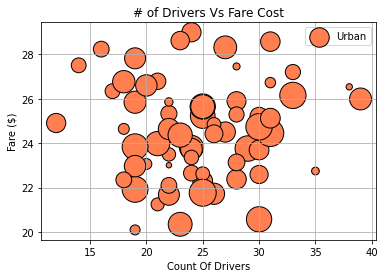

In [168]:
plt.scatter(urban_city_count, urban_city_mean, s= 10 *driver_mean_urban, label = "Urban", c ='coral', edgecolor = 'black')
plt.xlabel('Count Of Drivers')
plt.ylabel('Fare ($)')
plt.title('# of Drivers Vs Fare Cost')
plt.grid(True)
plt.legend()

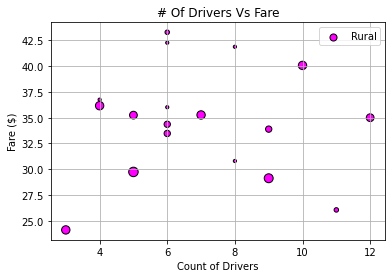

In [177]:
plt.scatter(rural_city_count, rural_city_mean, s= 10*driver_mean_rural, c = 'magenta', edgecolor = 'black', label = 'Rural')
plt.xlabel('Count of Drivers')
plt.ylabel('Fare ($)')
plt.title('# Of Drivers Vs Fare')
plt.grid(True)
plt.legend()

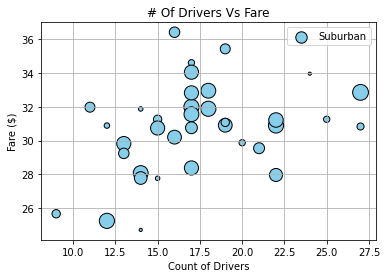

In [187]:
plt.scatter(suburban_city_count, suburban_city_mean, c ='skyblue', s = 10*driver_mean_suburban, edgecolor ='black', label = 'Suburban')
plt.xlabel('Count of Drivers')
plt.ylabel('Fare ($)')
plt.title('# Of Drivers Vs Fare')
plt.grid(True)
plt.legend()

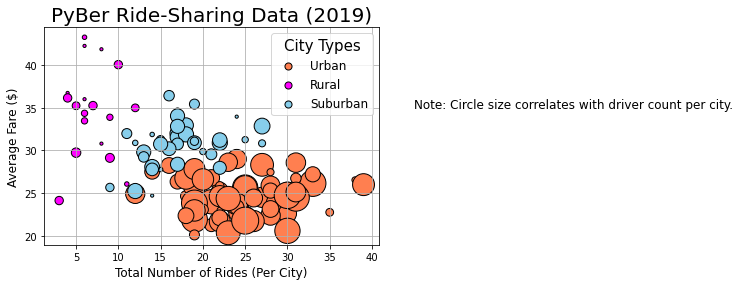

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>

In [209]:
plt.scatter(urban_city_count, urban_city_mean, s= 10 *driver_mean_urban, label = "Urban", c ='coral', edgecolor = 'black')
plt.scatter(rural_city_count, rural_city_mean, s= 10*driver_mean_rural, c = 'magenta', edgecolor = 'black', label = 'Rural')
plt.scatter(suburban_city_count, suburban_city_mean, c ='skyblue', s = 10*driver_mean_suburban, edgecolor ='black', label = 'Suburban')

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, title="City Types")

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.get_title().set_fontsize(15)

# Incorporate a text label about circle size.
plt.text(45, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")